### Utiliser votre meilleur modèle avec des photos prises pour l'occasion où vous représenterez différents signes

In [1]:
import os
import numpy as np
from PIL import Image

# Chemin du dossier contenant les images de la langue des signes
image_folder = './images'

# Taille des images à utiliser (28x28 pixels comme dans le dataset)
img_size = 28

# Fonction pour charger et prétraiter les images avec PIL
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            # Ouvrir l'image avec PIL
            img = Image.open(img_path)
            # Convertir l'image en niveaux de gris
            img_gray = img.convert("L")
            # Redimensionner l'image à la taille attendue par le modèle (28x28 pixels)
            img_resized = img_gray.resize((img_size, img_size))
            # Convertir l'image en tableau numpy et normaliser les pixels entre 0 et 1
            img_array = np.array(img_resized) / 255.0
            # Ajouter une dimension supplémentaire pour indiquer que c'est en niveaux de gris
            img_array = np.expand_dims(img_array, axis=-1)
            images.append(img_array)
        except Exception as e:
            print(f"Erreur lors du chargement de l'image {filename}: {e}")
    return np.array(images)

# Chargement des images
sign_images = load_images_from_folder(image_folder)

# Vérification de la forme des images chargées
print(f"Images chargées: {sign_images.shape}")

Images chargées: (102, 28, 28, 1)


In [2]:
from keras.models import load_model

# Charger un modèle pré-entraîné sauvegardé
model = load_model('best_model.keras')

In [3]:
labels = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    # 'J' est exclu
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24
    # 'Z' est exclu
}

In [4]:
# Prédictions sur les nouvelles images
predictions = model.predict(sign_images)

# Décoder les prédictions en lettres
predicted_labels = np.argmax(predictions, axis=1)
predicted_letters = [list(labels.keys())[list(labels.values()).index(label)] for label in predicted_labels]

# Affichage des résultats
for i, letter in enumerate(predicted_letters):
    print(f"Image {i+1}: Prédiction - {letter}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image 1: Prédiction - H
Image 2: Prédiction - H
Image 3: Prédiction - H
Image 4: Prédiction - H
Image 5: Prédiction - B
Image 6: Prédiction - B
Image 7: Prédiction - B
Image 8: Prédiction - B
Image 9: Prédiction - G
Image 10: Prédiction - G
Image 11: Prédiction - H
Image 12: Prédiction - H
Image 13: Prédiction - F
Image 14: Prédiction - F
Image 15: Prédiction - F
Image 16: Prédiction - F
Image 17: Prédiction - H
Image 18: Prédiction - H
Image 19: Prédiction - H
Image 20: Prédiction - H
Image 21: Prédiction - H
Image 22: Prédiction - H
Image 23: Prédiction - H
Image 24: Prédiction - H
Image 25: Prédiction - V
Image 26: Prédiction - Y
Image 27: Prédiction - L
Image 28: Prédiction - L
Image 29: Prédiction - L
Image 30: Prédiction - L
Image 31: Prédiction - L
Image 32: Prédiction - L
Image 33: Prédiction - A
Image 34: Prédiction - A
Image 35: Prédiction - A
Image 36: Prédiction - F
Image 37: Prédiction - F
Image 38: Prédiction - F
Image 39: Prédiction 

<Figure size 640x480 with 0 Axes>

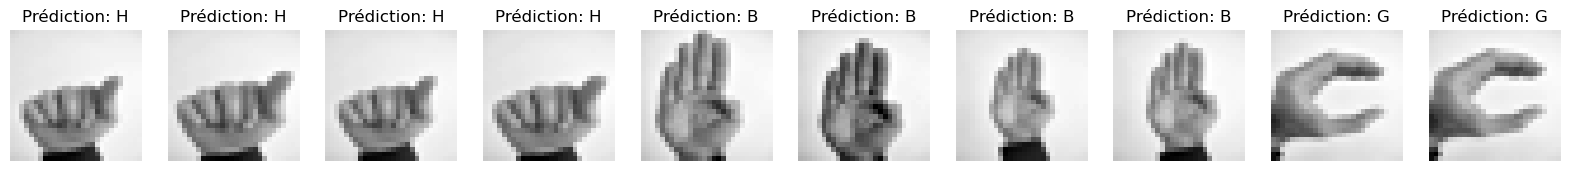

In [5]:
import matplotlib.pyplot as plt

plt.gray()

# Visualiser les images avec leurs prédictions
def show_predictions(images, predictions, num=10):
    plt.figure(figsize=(20, 2))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(images[i])
        plt.title(f"Prédiction: {predictions[i]}")
        plt.axis('off')
    plt.show()

# Afficher les prédictions pour quelques images
show_predictions(sign_images, predicted_letters)

### Choisir un des modèles pré-entrainés disponible avec Keras. Le charger et le personnaliser avec des couches de convolution et complètement connectées. L'entraîner et mesurer sa performance. La comparer avec celles de votre meilleur modèle

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Charger les datasets depuis le fichier CSV
train_data = pd.read_csv('./sign_mnist_train.csv')
test_data = pd.read_csv('./sign_mnist_test.csv')

# Extraire les étiquettes et les pixels
train_labels = train_data['label'].values
train_images = train_data.drop('label', axis=1).values

test_labels = test_data['label'].values
test_images = test_data.drop('label', axis=1).values

# Reshaper les images pour qu'elles soient 28x28x1 (grayscale)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Normaliser les valeurs des pixels entre 0 et 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Encoder les étiquettes en format one-hot
train_labels = to_categorical(train_labels, num_classes=25)
test_labels = to_categorical(test_labels, num_classes=25)

# Redimensionner les images d'entraînement et de test à 32x32
train_images_resized = tf.image.resize(train_images, (32, 32)).numpy()  # Conversion en tableau NumPy
test_images_resized = tf.image.resize(test_images, (32, 32)).numpy()    # Conversion en tableau NumPy

# Diviser les données redimensionnées en sous-ensemble d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(train_images_resized, train_labels, test_size=0.2, random_state=42)

In [7]:
# Import the VGG16 model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

# Charger VGG16 model pré-entraîné avec les poids d'ImageNet, adapté aux images RGB avec 3 canaux
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Geler les couches du modèle de base pour éviter de réentraîner les poids d'ImageNet
base_model.trainable = False

# Construire le modèle avec quelques couches supplémentaires
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Réduction de la dimension
    Dense(128, activation='relu'),  # Couche fully connected avec 128 unités
    Dense(25, activation='softmax')  # Couche de sortie avec 25 classes
])

# Compiler le modèle
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Normalisation et conversion des images en 3 canaux
def convert_to_rgb_and_normalize(images):
    # Utiliser np.repeat pour dupliquer le canal unique 3 fois
    images_rgb = np.repeat(images, 3, axis=-1)
    return images_rgb

# Conversion des données d'entraînement et de validation
X_train_rgb = convert_to_rgb_and_normalize(X_train)
X_val_rgb = convert_to_rgb_and_normalize(X_val)

# Entraîner le modèle
history = model.fit(X_train_rgb, y_train, validation_data=(X_val_rgb, y_val), epochs=10, batch_size=32)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 160s 229ms/step - accuracy: 0.5535 - loss: 1.7144 - val_accuracy: 0.8492 - val_loss: 0.5125
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 133s 194ms/step - accuracy: 0.8996 - loss: 0.3999 - val_accuracy: 0.9372 - val_loss: 0.2591
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 141s 205ms/step - accuracy: 0.9558 - loss: 0.2110 - val_accuracy: 0.9745 - val_loss: 0.1440
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 139s 203ms/step - accuracy: 0.9778 - loss: 0.1268 - val_accuracy: 0.9865 - val_loss: 0.0898
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 139s 202ms/step - accuracy: 0.9871 - loss: 0.0823 - val_accuracy: 0.9882 - val_loss: 0.0683
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 139s 202ms/step - accuracy: 0.9921 - loss: 0.0580 - val_accuracy: 0.9931 - val_loss: 0.0453
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 139s 203ms/step - accuracy: 0.9940 - loss: 0.0434 - val_accuracy: 0.9958 - val_loss: 0.0307
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 138s 201ms/step - accuracy: 0.9967 -

In [8]:
import seaborn as sns

def plot_history(history):
    fig, axes = plt.subplots(1,2, figsize=(15,6))
    hist_data = history.history
    hist_data["epochs"] = list(range(1, len(history.history["loss"])+1))

    hist_data = pd.DataFrame(hist_data)
    sns.lineplot(data=hist_data, x="epochs", y="loss", ax=axes[0], color = "blue")
    sns.lineplot(data=hist_data, x="epochs", y="val_loss", ax=axes[0], color = "orange")

    sns.lineplot(data=hist_data, x="epochs", y="accuracy", ax=axes[1], color = "blue")
    sns.lineplot(data=hist_data, x="epochs", y="val_accuracy", ax=axes[1], color = "orange")

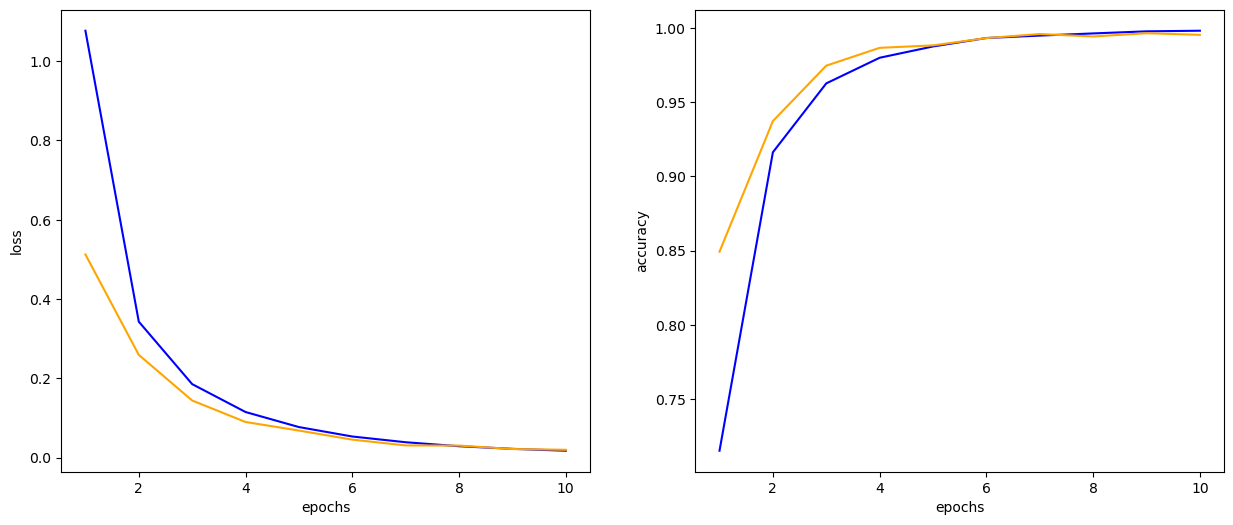

In [9]:
plot_history(history)

In [10]:
test_images_rgb = convert_to_rgb_and_normalize(test_images_resized)
test_loss, test_accuracy = model.evaluate(test_images_rgb, test_labels)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 36s 162ms/step - accuracy: 0.9335 - loss: 0.2087
Test Accuracy: 0.9348856806755066
Test Loss: 0.19653262197971344


In [11]:
# Normalisation et conversion des images en 32x32 et en 3 canaux RGB
def preprocess_images(images):
    # Redimensionner les images en 32x32
    images_resized = tf.image.resize(images, (32, 32)).numpy()  # Convert to NumPy array after resizing
    # Convertir en RGB en répétant le canal unique 3 fois
    images_rgb = np.repeat(images_resized, 3, axis=-1)
    return images_rgb

# Preprocessing des nouvelles images
sign_images_preprocessed = preprocess_images(sign_images)

# Prédictions sur les nouvelles images
predictions = model.predict(sign_images_preprocessed)

# Décoder les prédictions en lettres
predicted_labels = np.argmax(predictions, axis=1)
predicted_letters = [list(labels.keys())[list(labels.values()).index(label)] for label in predicted_labels]

# Affichage des résultats
for i, letter in enumerate(predicted_letters):
    print(f"Image {i+1}: Prédiction - {letter}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step
Image 1: Prédiction - X
Image 2: Prédiction - A
Image 3: Prédiction - X
Image 4: Prédiction - M
Image 5: Prédiction - N
Image 6: Prédiction - M
Image 7: Prédiction - X
Image 8: Prédiction - X
Image 9: Prédiction - H
Image 10: Prédiction - H
Image 11: Prédiction - C
Image 12: Prédiction - H
Image 13: Prédiction - F
Image 14: Prédiction - F
Image 15: Prédiction - F
Image 16: Prédiction - F
Image 17: Prédiction - H
Image 18: Prédiction - H
Image 19: Prédiction - H
Image 20: Prédiction - H
Image 21: Prédiction - H
Image 22: Prédiction - H
Image 23: Prédiction - H
Image 24: Prédiction - L
Image 25: Prédiction - V
Image 26: Prédiction - V
Image 27: Prédiction - V
Image 28: Prédiction - X
Image 29: Prédiction - L
Image 30: Prédiction - L
Image 31: Prédiction - L
Image 32: Prédiction - L
Image 33: Prédiction - E
Image 34: Prédiction - M
Image 35: Prédiction - M
Image 36: Prédiction - E
Image 37: Prédiction - X
Image 38: Prédiction - E
Image 39: Prédiction

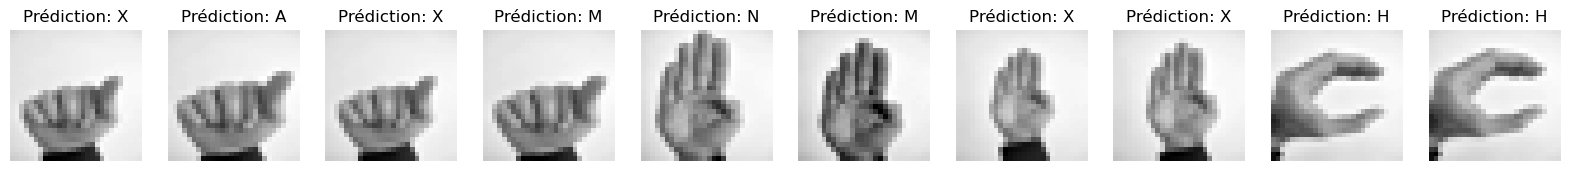

In [12]:
import matplotlib.pyplot as plt

# Visualiser les images avec leurs prédictions
def show_predictions(images, predictions, num=10):
    plt.figure(figsize=(20, 2))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(images[i])
        plt.title(f"Prédiction: {predictions[i]}")
        plt.axis('off')
    plt.show()

# Afficher les prédictions pour quelques images
show_predictions(sign_images, predicted_letters)